In [ ]:
# Getting Started

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


# Data Understanding and cleaning

In [246]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv", low_memory=False)

In [247]:
df.columns

Index(['YearStart', 'YearEnd', 'LocationAbbr', 'LocationDesc', 'DataSource',
       'Topic', 'Question', 'Response', 'DataValueUnit', 'DataValueType',
       'DataValue', 'DataValueAlt', 'DataValueFootnoteSymbol',
       'DatavalueFootnote', 'LowConfidenceLimit', 'HighConfidenceLimit',
       'StratificationCategory1', 'Stratification1', 'StratificationCategory2',
       'Stratification2', 'StratificationCategory3', 'Stratification3',
       'GeoLocation', 'ResponseID', 'LocationID', 'TopicID', 'QuestionID',
       'DataValueTypeID', 'StratificationCategoryID1', 'StratificationID1',
       'StratificationCategoryID2', 'StratificationID2',
       'StratificationCategoryID3', 'StratificationID3'],
      dtype='object')

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1185676 entries, 0 to 1185675
Data columns (total 34 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   YearStart                  1185676 non-null  int64  
 1   YearEnd                    1185676 non-null  int64  
 2   LocationAbbr               1185676 non-null  object 
 3   LocationDesc               1185676 non-null  object 
 4   DataSource                 1185676 non-null  object 
 5   Topic                      1185676 non-null  object 
 6   Question                   1185676 non-null  object 
 7   Response                   0 non-null        float64
 8   DataValueUnit              1033553 non-null  object 
 9   DataValueType              1185676 non-null  object 
 10  DataValue                  806942 non-null   object 
 11  DataValueAlt               804578 non-null   float64
 12  DataValueFootnoteSymbol    393710 non-null   object 
 13  DatavalueFoo

## Check empty columns

In [249]:
column_names = df.columns

empty_columns = []

for column in column_names:
    if df[column].notnull().sum() == 0:
        empty_columns.append(column)

# Convert the list to a Pandas Series
empty_columns_series = pd.Series(empty_columns)

print("Empty Columns:")
print(empty_columns_series)


Empty Columns:
0                     Response
1      StratificationCategory2
2              Stratification2
3      StratificationCategory3
4              Stratification3
5                   ResponseID
6    StratificationCategoryID2
7            StratificationID2
8    StratificationCategoryID3
9            StratificationID3
dtype: object


In [250]:
# Drop empty and unnecessary columns
df.drop(empty_columns_series, inplace=True,axis=1)
df.drop(['GeoLocation', 'LocationID'], inplace=True,axis=1)

In [251]:
# Calculating durations of the questions
df['Duration'] = df['YearEnd'] - df['YearStart'] + 1

df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,Number,30,...,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,CVD,CVD1_4,NMBR,RACE,AIAN,1
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,29.5,...,24.9,34.7,Gender,Female,ALC,ALC1_1,CRDPREV,GENDER,GENF,1
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,22.5,...,17.0,29.1,Gender,Male,ALC,ALC1_1,CRDPREV,GENDER,GENM,1
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,13.9,...,10.4,18.4,Race/Ethnicity,"Asian, non-Hispanic",ALC,ALC1_1,CRDPREV,RACE,ASN,1
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,...,NaN,NaN,Gender,Male,ALC,ALC1_1,CRDPREV,GENDER,GENM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",DIA,DIA7_0,AGEADJPREV,RACE,WHT,1
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,...,38.5,44.6,Race/Ethnicity,"White, non-Hispanic",OLD,OLD3_1,CRDPREV,RACE,WHT,1
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,ART,ART2_1,AGEADJPREV,RACE,HIS,1
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,DIA,DIA2_2,CRDPREV,RACE,HIS,1


## 1# Are Alternative Values trusted?

### Analysis on the number of alternative values that differ from the original values

In [252]:
alternative_values = df[df['DataValueAlt'].notnull()]
# Convert DataValueAlt to float as it was a string in the original dataset because of various types of values
alternative_values['DataValue'] = alternative_values['DataValue'].astype(float)
alternative_values.query('DataValueAlt != DataValue')


C:\Users\Ahmed Khaled\AppData\Local\Temp\ipykernel_24632\300645848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  alternative_values['DataValue'] = alternative_values['DataValue'].astype(float)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration
432,2012,2016,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,166474.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
91382,2009,2013,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,160094.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
91763,2015,2019,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,131174.0,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",CAN,CAN4_1,AVGANNNMBR,RACE,WHT,5
93423,2010,2014,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,161679.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
93783,2013,2017,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,129357.0,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",CAN,CAN4_1,AVGANNNMBR,RACE,WHT,5
95325,2008,2012,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,158666.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
96054,2009,2013,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,124627.0,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",CAN,CAN4_1,AVGANNNMBR,RACE,WHT,5
97156,2015,2019,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,173660.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
98185,2011,2015,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,126622.0,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",CAN,CAN4_1,AVGANNNMBR,RACE,WHT,5
99523,2014,2018,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,171798.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5


#### 1.1 Most of the alternative values are the same as the original values, why not all?

In [253]:
alt_query = 'Question == "Invasive cancer (all sites combined), incidence" and DataValue != DataValueAlt and DataValueType == "Average Annual Number" and StratificationCategory1 == "Overall"'
overall_cancer = alternative_values.query(alt_query)
overall_cancer.sort_values(by=['YearStart'], inplace=True)
overall_cancer


C:\Users\Ahmed Khaled\AppData\Local\Temp\ipykernel_24632\2773971428.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_cancer.sort_values(by=['YearStart'], inplace=True)


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration
95325,2008,2012,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,158666.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
91382,2009,2013,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,160094.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
93423,2010,2014,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,161679.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
104570,2011,2015,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,164198.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
432,2012,2016,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,166474.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
102020,2013,2017,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,169478.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
99523,2014,2018,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,171798.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5
97156,2015,2019,US,United States,Statewide central cancer registries,Cancer,"Invasive cancer (all sites combined), incidence",NaN,Average Annual Number,173660.0,...,NaN,NaN,Overall,Overall,CAN,CAN4_1,AVGANNNMBR,OVERALL,OVR,5


#### 1.2 Alt values contain 1 more digit than original values in the USA experiment, which is correct?

C:\Users\Ahmed Khaled\AppData\Local\Temp\ipykernel_24632\425311586.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sum_states_scores['DataValue'] = sum_states_scores['DataValue'].astype(float)
C:\Users\Ahmed Khaled\AppData\Local\Temp\ipykernel_24632\425311586.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  overall_cancer['DataValueAlt'] = overall_cancer['DataValueAlt'].astype(int)


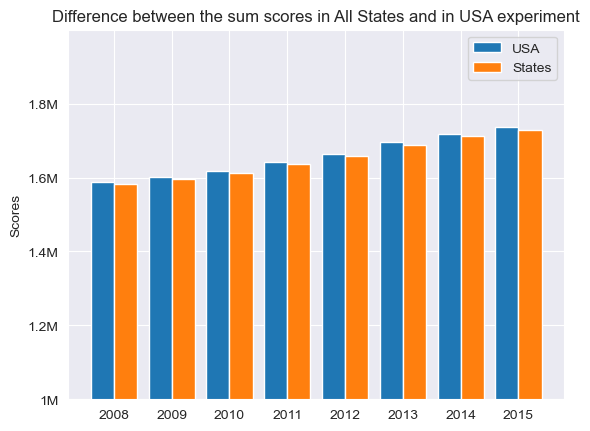

In [254]:
sum_states_scores = df.query('Question == "Invasive cancer (all sites combined), incidence" and DataValueType == "Average Annual Number" and StratificationCategory1 == "Overall" and LocationAbbr != "US"')
sss_columns = sum_states_scores['LocationDesc'].unique()
sum_states_scores['DataValue'] = sum_states_scores['DataValue'].astype(float)
sum_states_scores = sum_states_scores.groupby('YearStart').agg({'DataValue': 'sum'})
overall_cancer['DataValueAlt'] = overall_cancer['DataValueAlt'].astype(int)

fig, ax = plt.subplots()

bar_width = 0.4  # Adjust the width of the bars
x = overall_cancer['YearStart']  # X-axis values

# Adjust the x-positions of the bars
x1 = x - bar_width / 2
x2 = x + bar_width / 2

# Create the first bar for USA
ax.bar(x1, overall_cancer['DataValueAlt'], width=bar_width, label='USA')

# Create the second bar for States
ax.bar(x2, sum_states_scores['DataValue'], width=bar_width, label='States')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Difference between the sum scores in All States and in USA experiment')

# Set xticks to the center of the grouped bars
ax.set_xticks(x)
ax.set_xticklabels(x)  # Rotate the x-axis labels for better readability
ax.set_ylim(1000000, 2000000)
ax.set_yticks([1000000, 1200000, 1400000, 1600000, 1800000], ["1M", "1.2M", "1.4M", "1.6M", "1.8M"])
ax.legend()
plt.savefig('Difference between the sum scores in All States and in USA experiment.png', dpi=900)
plt.show()


### 2# Why the USA experiment is different from the sum of all states (Slightly higher)?

In [255]:
# The states that in df and not in sum_states_scores
u = set(df['LocationDesc'].unique()) - set(sss_columns)
u

{'Guam', 'Puerto Rico', 'United States', 'Virgin Islands'}

### Replace the original values with the alternative values and drop the alternative values column

In [256]:
# replace the DataValue with the DataValueAlt only if DataValueAlt is not null
df['DataValue'] = np.where(df['DataValueAlt'].notnull(), df['DataValueAlt'], df['DataValue'])
df.query('DataValueAlt != DataValue and DataValueAlt.notnull()')

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration


In [257]:
df.drop('DataValueAlt', inplace=True, axis=1)


# Analysis on the whole dataset

## Analysis on the number of questions
### 3# By data source

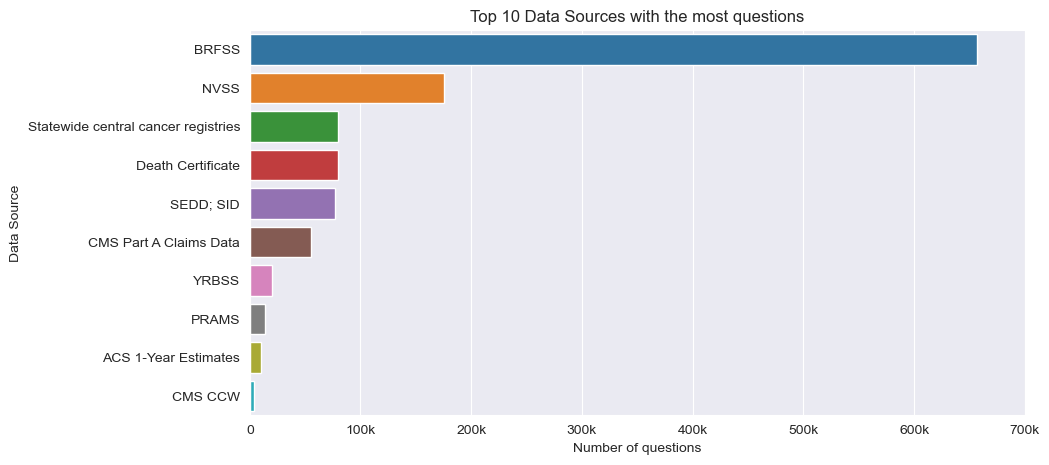

In [258]:
# count plot of the number of questions by data source
sns.countplot(y='DataSource', data=df, order=df['DataSource'].value_counts().head(10).index)
plt.title("Top 10 Data Sources with the most questions")
plt.ylabel("Data Source")
plt.xlabel("Number of questions")
plt.xticks([0, 100000, 200000, 300000, 400000, 500000, 600000, 700000], ["0", "100k", "200k", "300k", "400k", "500k", "600k", "700k"])
# change figure size
plt.gcf().set_size_inches(10, 5)
plt.savefig('Top 10 Data Sources with the most questions.png', dpi=900)
plt.show()

In [259]:
# minimum and maximum question of data source
df_sorted_by_ds = df.value_counts('DataSource')
print("Name of data source with minimum questions: ", df_sorted_by_ds.index[-1], " with ", df_sorted_by_ds[-1], " questions")
print("Name of data source with maximum questions: ", df_sorted_by_ds.index[0], " with ", df_sorted_by_ds[0], " questions")

Name of data source with minimum questions:  Birth Certificate, NVSS  with  52  questions
Name of data source with maximum questions:  BRFSS  with  657205  questions


### 4# by Topic

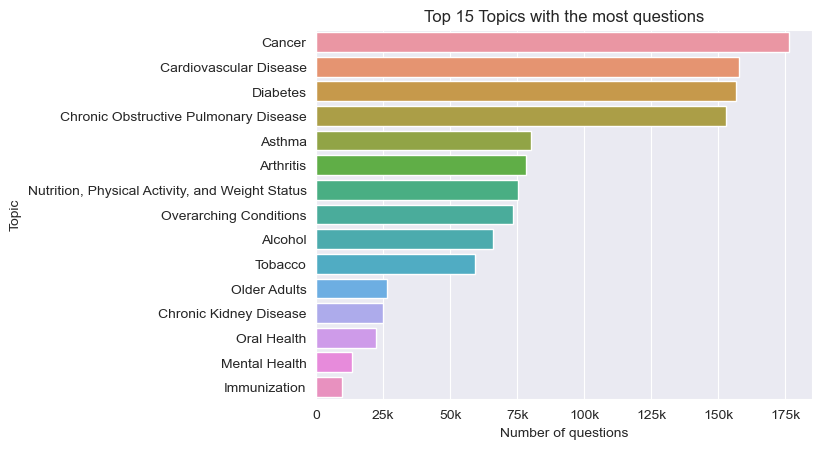

In [260]:
# count plot of the number of questions by topic
sns.countplot(y='Topic', data=df, order=df['Topic'].value_counts().head(15).index)
plt.title("Top 15 Topics with the most questions")
plt.ylabel("Topic")
plt.xlabel("Number of questions")
plt.xticks([0, 25000, 50000, 75000, 100000, 125000, 150000, 175000], ["0", "25k", "50k", "75k", "100k", "125k", "150k", "175k"])
plt.savefig('Top 15 Topics with the most questions.png', dpi=900)
plt.show()

In [261]:
# minimum and maximum question of topic
df_sorted_by_topic = df.value_counts('Topic')
print("Name of topic with minimum questions: ", df_sorted_by_topic.index[-1], " with ", df_sorted_by_topic[-1], " questions")
print("Name of topic with maximum questions: ", df_sorted_by_topic.index[0], " with ", df_sorted_by_topic[0], " questions")

Name of topic with minimum questions:  Disability  with  3922  questions
Name of topic with maximum questions:  Cancer  with  176339  questions


### 5# By location

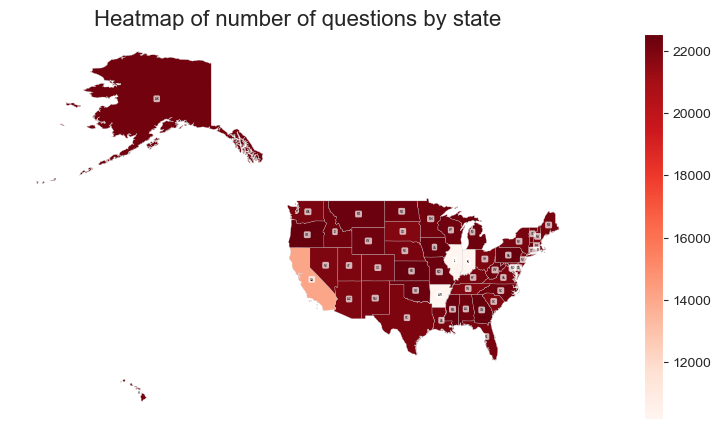

In [262]:
# count plot of the number of questions by location
# Load the U.S. states shapefile
us_states = gpd.read_file('States_shapefile.geojson')

merged = us_states.join(df.set_index('LocationAbbr'))
merged['QuestionCount'] = df.groupby('LocationAbbr')['LocationAbbr'].transform('count')
# Create the heatmap plot
fig, ax = plt.subplots(figsize=(15, 5))
merged.plot(column='QuestionCount', ax=ax, legend=True, linewidth=0.2, edgecolor='0.8', cmap ='Reds')

# Annotate each state with its abbreviation (state code)
for idx, row in merged.iterrows():
    state_abbr = row['State_Code']
    state_centroid = row['geometry'].centroid
    ax.annotate(state_abbr, (state_centroid.x, state_centroid.y), fontsize=2,
                ha='center', va='center', color='black',  bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5', alpha=0.7))
# Remove axes
ax.set_axis_off()
plt.title("Heatmap of number of questions by state", fontsize=16)
plt.savefig('Heatmap of number of questions by state.png', dpi=900)
plt.show()



In [263]:
# minimum and maximum question of State
df_sorted_by_location = df.value_counts('LocationDesc')
df_sorted_by_location.drop('United States', inplace=True)
print("Name of State with minimum questions: ", df_sorted_by_location.index[-1], " with ", df_sorted_by_location[-1], " questions")
print("Name of State with maximum questions: ", df_sorted_by_location.index[0], " with ", df_sorted_by_location[0], " questions")

Name of State with minimum questions:  Guam  with  14009  questions
Name of State with maximum questions:  New York  with  22556  questions


### 6# by Stratification

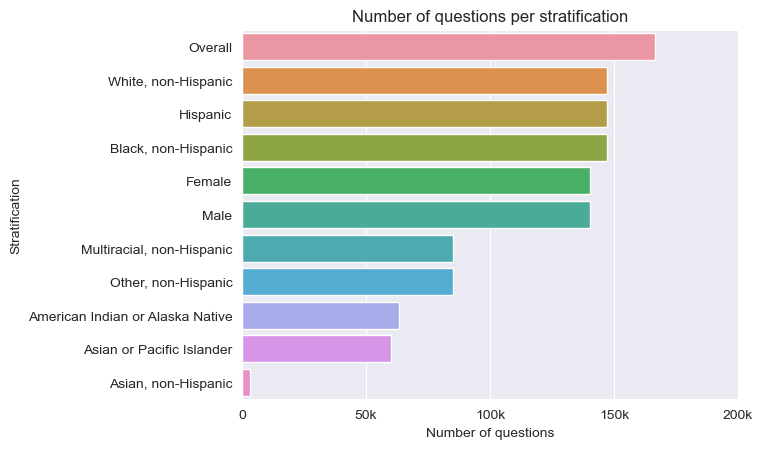

In [264]:
sns.countplot(y='Stratification1', data=df, order=df['Stratification1'].value_counts().index)
plt.title("Number of questions per stratification")
plt.ylabel("Stratification")
plt.xlabel("Number of questions")
plt.xticks([0, 50000 ,100000, 150000, 200000], ["0", "50k", "100k", "150k", "200k"])
plt.savefig('Number of questions per stratification.png', dpi=900)
plt.show()

In [265]:
# minimum and maximum question of Stratification
df_sorted_by_stratification = df.value_counts('Stratification1')
print("Name of Stratification with minimum questions: ", df_sorted_by_stratification.index[-1], " with ", df_sorted_by_stratification[-1], " questions")
print("Name of Stratification with maximum questions: ", df_sorted_by_stratification.index[0], " with ", df_sorted_by_stratification[0], " questions")

Name of Stratification with minimum questions:  Asian, non-Hispanic  with  3267  questions
Name of Stratification with maximum questions:  Overall  with  166332  questions


### 7# by year and duration

In [266]:
# Maximum record of duration
df[df['Duration'] == df['Duration'].max()]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration
264,2013,2017,AK,Alaska,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,62.0,...,NaN,NaN,Gender,Male,CAN,CAN10_1,AVGANNNMBR,GENDER,GENM,5
265,2014,2018,AK,Alaska,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,84.0,...,NaN,NaN,Overall,Overall,CAN,CAN10_1,AVGANNNMBR,OVERALL,OVR,5
266,2009,2013,CT,Connecticut,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,325.0,...,NaN,NaN,Gender,Male,CAN,CAN10_1,AVGANNNMBR,GENDER,GENM,5
267,2014,2018,CT,Connecticut,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,46.0,...,NaN,NaN,Race/Ethnicity,Hispanic,CAN,CAN10_1,AVGANNNMBR,RACE,HIS,5
268,2008,2012,DC,District of Columbia,Statewide central cancer registries,Cancer,"Invasive cancer of the oral cavity or pharynx,...",NaN,Average Annual Number,73.0,...,NaN,NaN,Overall,Overall,CAN,CAN10_1,AVGANNNMBR,OVERALL,OVR,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217935,2013,2017,DC,District of Columbia,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,NaN,...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,CAN,CAN9_2,AVGANNNMBR,RACE,APIO,5
217936,2014,2018,SD,South Dakota,Death Certificate,Cancer,"Melanoma, mortality",NaN,Average Annual Number,NaN,...,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,CAN,CAN9_2,AVGANNNMBR,RACE,AIAO,5
217937,2010,2014,SD,South Dakota,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Crude Rate,2.8,...,2.3,3.4,Overall,Overall,CAN,CAN9_2,AVGANNCRDRATE,OVERALL,OVR,5
217938,2008,2012,KY,Kentucky,Death Certificate,Cancer,"Melanoma, mortality","per 100,000",Average Annual Crude Rate,NaN,...,NaN,NaN,Race/Ethnicity,Asian or Pacific Islander,CAN,CAN9_2,AVGANNCRDRATE,RACE,APIO,5


In [267]:
# Minimum record of duration
df[df['Duration'] == df['Duration'].min()]

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,LowConfidenceLimit,HighConfidenceLimit,StratificationCategory1,Stratification1,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,Duration
0,2010,2010,OR,Oregon,NVSS,Cardiovascular Disease,Mortality from heart failure,NaN,Number,30.0,...,NaN,NaN,Race/Ethnicity,American Indian or Alaska Native,CVD,CVD1_4,NMBR,RACE,AIAN,1
1,2019,2019,AZ,Arizona,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,29.5,...,24.9,34.7,Gender,Female,ALC,ALC1_1,CRDPREV,GENDER,GENF,1
2,2019,2019,OH,Ohio,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,22.5,...,17.0,29.1,Gender,Male,ALC,ALC1_1,CRDPREV,GENDER,GENM,1
3,2019,2019,US,United States,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,13.9,...,10.4,18.4,Race/Ethnicity,"Asian, non-Hispanic",ALC,ALC1_1,CRDPREV,RACE,ASN,1
4,2015,2015,VI,Virgin Islands,YRBSS,Alcohol,Alcohol use among youth,%,Crude Prevalence,NaN,...,NaN,NaN,Gender,Male,ALC,ALC1_1,CRDPREV,GENDER,GENM,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1185671,2020,2020,WY,Wyoming,BRFSS,Diabetes,Dilated eye examination among adults aged >= 1...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,"White, non-Hispanic",DIA,DIA7_0,AGEADJPREV,RACE,WHT,1
1185672,2020,2020,WY,Wyoming,BRFSS,Older Adults,Proportion of older adults aged >= 65 years wh...,%,Crude Prevalence,41.5,...,38.5,44.6,Race/Ethnicity,"White, non-Hispanic",OLD,OLD3_1,CRDPREV,RACE,WHT,1
1185673,2017,2017,IA,Iowa,BRFSS,Arthritis,Activity limitation due to arthritis among adu...,%,Age-adjusted Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,ART,ART2_1,AGEADJPREV,RACE,HIS,1
1185674,2020,2020,WY,Wyoming,BRFSS,Diabetes,Diabetes prevalence among women aged 18-44 years,%,Crude Prevalence,NaN,...,NaN,NaN,Race/Ethnicity,Hispanic,DIA,DIA2_2,CRDPREV,RACE,HIS,1


# Analysis between answered and non answered questions

In [268]:
answered_df = df[df['DataValue'].notnull()]
non_answered_df = df[df['DataValue'].isnull()]

## Difference between answered and non answered questions

### 8# By year and duration

In [269]:
# Calculating average of the duration of the questions
print ("Average Duration of answered questions: ", answered_df['Duration'].mean())
print ("Average Duration of non answered questions: ",non_answered_df['Duration'].mean())

Average Duration of answered questions:  1.6043309184551058
Average Duration of non answered questions:  1.4041781302972536


### 9# By number of questions

In [270]:
# Calculating the number of questions that have been answered
print ("Number of answered questions: ", answered_df.shape[0])
print ("Number of non answered questions: ", non_answered_df.shape[0])

Number of answered questions:  806942
Number of non answered questions:  378734


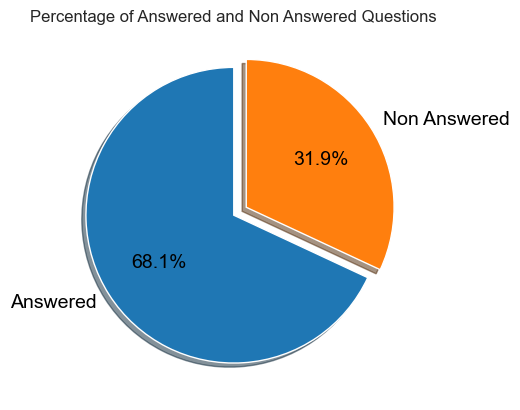

In [271]:
# Pie chart of the number of answered and non answered questions by percentage
labels = 'Answered', 'Non Answered'
sizes = [answered_df.shape[0], non_answered_df.shape[0]]
explode = (0, 0.1)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'color': 'black'})
plt.title("Percentage of Answered and Non Answered Questions")
plt.savefig('Percentage of Answered and Non Answered Questions.png')
plt.show()

### 10# By data source

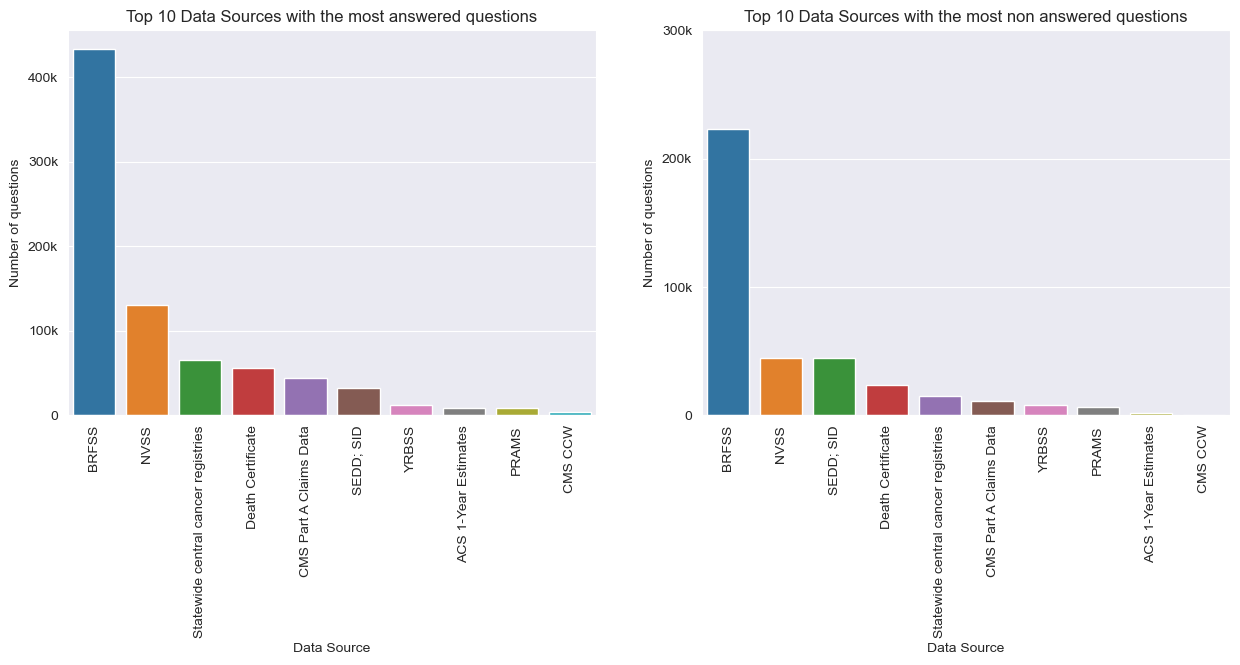

In [272]:
# 2 count plots of the number of answered and non answered questions by data source
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], x='DataSource', data=answered_df, order=answered_df['DataSource'].value_counts().head(10).index)
axes[0].set_title("Top 10 Data Sources with the most answered questions")
axes[0].set_xlabel("Data Source")
axes[0].set_ylabel("Number of questions")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=90)
axes[0].set_yticks([0, 100000, 200000, 300000, 400000], ["0", "100k", "200k", "300k", "400k"])
sns.countplot(ax=axes[1], x='DataSource', data=non_answered_df, order=non_answered_df['DataSource'].value_counts().head(10).index)
axes[1].set_title("Top 10 Data Sources with the most non answered questions")
axes[1].set_xlabel("Data Source")
axes[1].set_ylabel("Number of questions")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=90)
axes[1].set_yticks([0, 100000, 200000, 300000], ["0", "100k", "200k", "300k"])
plt.savefig('Top 10 Data Sources with the most answered and non answered questions.png', dpi=900)
plt.show()



### 11# By Topic

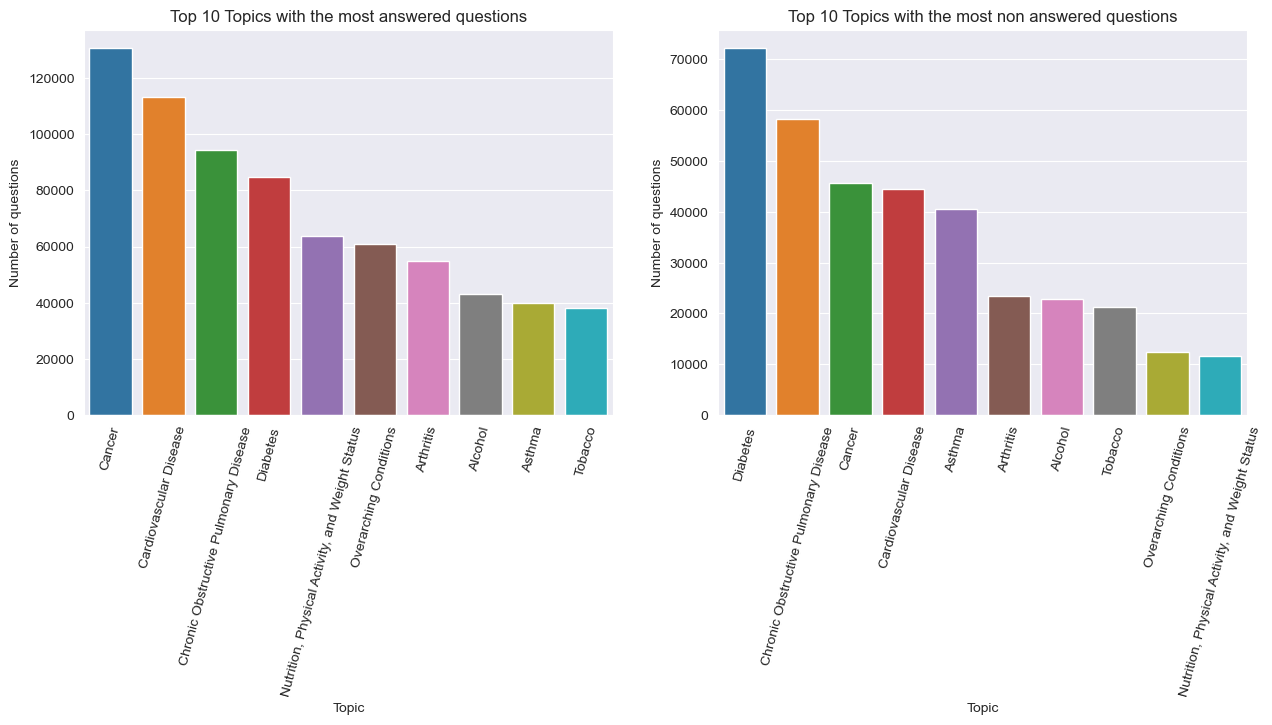

In [273]:
# 2 count plots of the number of answered and non answered questions by topic
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.countplot(ax=axes[0], x='Topic', data=answered_df, order=answered_df['Topic'].value_counts().head(10).index)
axes[0].set_title("Top 10 Topics with the most answered questions")
axes[0].set_xlabel("Topic")
axes[0].set_ylabel("Number of questions")
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=75)
sns.countplot(ax=axes[1], x='Topic', data=non_answered_df, order=non_answered_df['Topic'].value_counts().head(10).index)
axes[1].set_title("Top 10 Topics with the most non answered questions")
axes[1].set_xlabel("Topic")
axes[1].set_ylabel("Number of questions")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=75)
plt.savefig('Top 10 Topics with the most answered and non answered questions.png', dpi=900)
plt.show()

### 12# By State

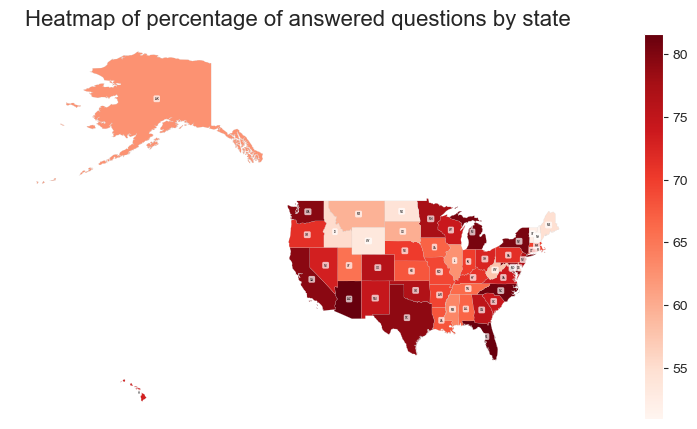

In [274]:
# Heatmap of the percentage of answered questions by state
ans_merged = answered_df.groupby('LocationAbbr')['LocationAbbr'].count().reset_index(name='AnsweredCount')
q_per_state = df.groupby('LocationAbbr')['LocationAbbr'].count().reset_index(name='AnsweredCount')
ans_merged['Percentage'] = 100 * ans_merged['AnsweredCount'] / q_per_state['AnsweredCount']


ans_merged = us_states.merge(ans_merged, left_on='State_Code', right_on='LocationAbbr')

# Create the heatmap plot
fig, ax = plt.subplots(figsize=(15, 5))
ans_merged.plot(column='Percentage', legend=True, ax=ax, linewidth=0.1, edgecolor='0.8', cmap = 'Reds')

for idx, row in ans_merged.iterrows():
    state_abbr = row['State_Code']
    state_centroid = row['geometry'].centroid
    ax.annotate(state_abbr , (state_centroid.x, state_centroid.y), fontsize=2,
                ha='center', va='center', color='black',  bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.5', alpha=0.7))
#ans_merged
ax.set_axis_off()
plt.title("Heatmap of percentage of answered questions by state", fontsize=16)
plt.savefig('Heatmap of percentage of answered questions by state.png', dpi=900)
plt.show()
# plt.savefig('heatmap.png', dpi=300)

In [275]:
# minimum and maximum percentage of State
ans_merged_sorted = ans_merged.sort_values(by=['Percentage'], ascending=True)
print("Name of State with minimum percentage of answered questions: ", ans_merged_sorted['State_Name'].iloc[0], " with ", ans_merged_sorted['Percentage'].iloc[0], " percentage")
print("Name of State with maximum percentage of answered questions: ", ans_merged_sorted['State_Name'].iloc[-1], " with ", ans_merged_sorted['Percentage'].iloc[-1], " percentage")

Name of State with minimum percentage of answered questions:  NEW HAMPSHIRE  with  50.954578356858484  percentage
Name of State with maximum percentage of answered questions:  ARIZONA  with  81.58591890799694  percentage


#### 13# Wyoming, North Dakota, Idaho has many non answered questions, Why?

In [276]:
# Wyoming has many non answered questions, Why?
empty_wy = df[(df['LocationAbbr'] == 'WY') & (df['DataValue'].isnull())]
# number of counts per each datavaluefootnote
empty_wy['DatavalueFootnote'].value_counts()


Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%                                                                                                                            4619
Data not shown because of too few respondents or cases                                                                                                                                                                                                     3677
No data available                                                                                                                                                                                                                                          2014
State directly controlled the sale of (beer/wine/distilled spirits) at the retail and/or wholesale levels. State prices for (beer/wine/distilled spirits) combined both markups and taxes, so tax rates for this beverage type could not

In [277]:
# North Dakota has many non answered questions, Why?
empty_nd = df[(df['LocationAbbr'] == 'ND') & (df['DataValue'].isnull())]
# number of counts per each datavaluefootnote
empty_nd['DatavalueFootnote'].value_counts()

Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%    4350
Data not shown because of too few respondents or cases                                                                             3619
No data available                                                                                                                  2090
Name: DatavalueFootnote, dtype: int64

In [278]:
# Idaho has many non answered questions, Why?
empty_id = df[(df['LocationAbbr'] == 'ID') & (df['DataValue'].isnull())]
# number of counts per each datavaluefootnote
empty_id['DatavalueFootnote'].value_counts()


Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%                                                                                                                            4287
Data not shown because of too few respondents or cases                                                                                                                                                                                                     3022
No data available                                                                                                                                                                                                                                          2456
State directly controlled the sale of (beer/wine/distilled spirits) at the retail and/or wholesale levels. State prices for (beer/wine/distilled spirits) combined both markups and taxes, so tax rates for this beverage type could not

#### 14# Why those states have many non answered questions?

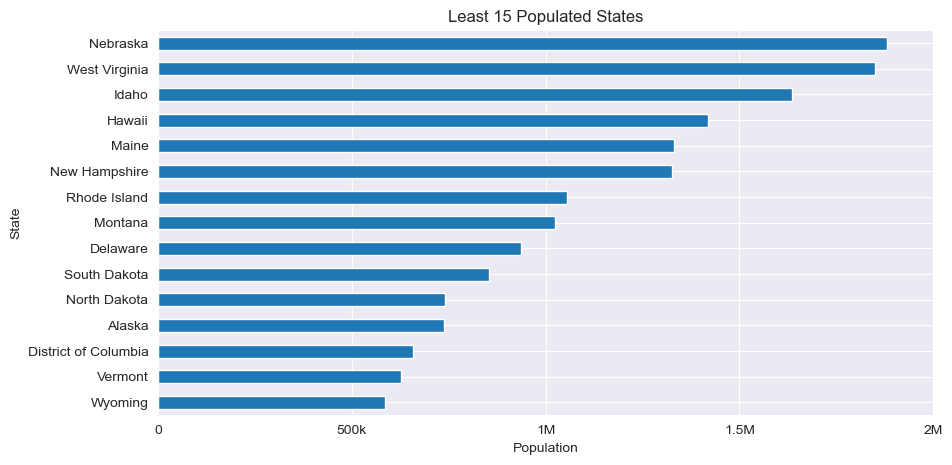

In [279]:
usa_pop = pd.read_csv("us-state-populations.csv")
# plot least 15 populated states
usa_pop.sort_values(by=['pop_2014'], inplace=True, ascending=True)
usa_pop.head(15).plot.barh(x='state', y='pop_2014', figsize=(10, 5), legend=False)
plt.title("Least 15 Populated States")
plt.xlabel("Population")
plt.ylabel("State")
plt.xlim(0, 2000000)
plt.xticks([0, 500000, 1000000, 1500000, 2000000], ["0", "500k", "1M", "1.5M", "2M"])
plt.savefig('Least 15 Populated States.png', dpi=900)
plt.show()


## Focusing on the non answered questions

### 15# Most reasons for non answered questions

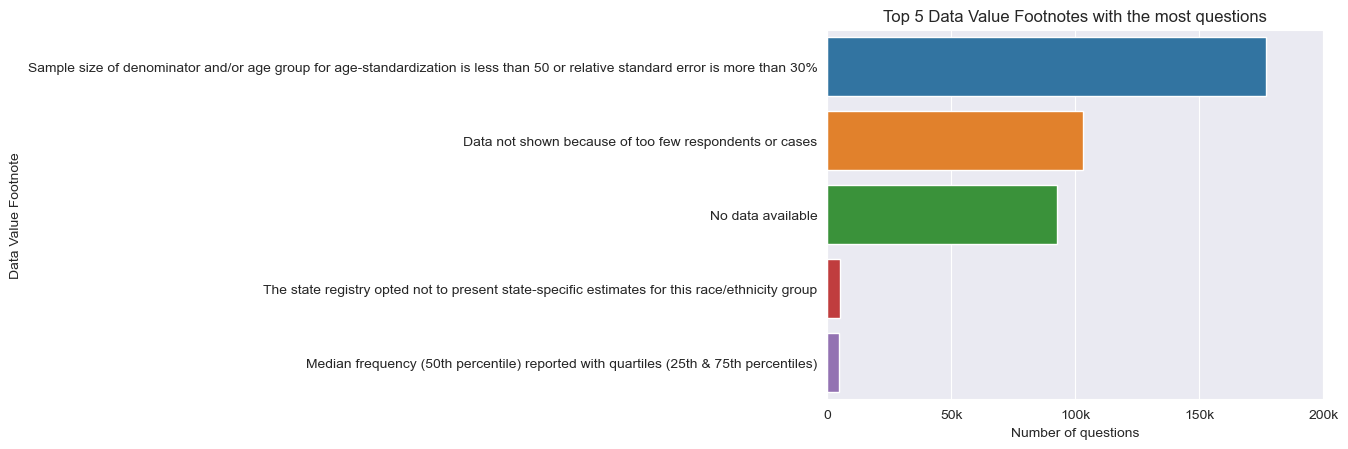

In [280]:
# Count plot on the count of each data value footnote
sns.countplot(y='DatavalueFootnote', data=df, order=df['DatavalueFootnote'].value_counts().head(5).index)
plt.title("Top 5 Data Value Footnotes with the most questions")
plt.ylabel("Data Value Footnote")
plt.xlabel("Number of questions")
plt.xlim(0, 200000)
plt.xticks([0, 50000, 100000, 150000, 200000], ["0", "50k", "100k", "150k", "200k"])
plt.savefig('Top 5 Data Value Footnotes with the most questions.png', dpi=900)
plt.show()

### 16# Percentage of non answered questions by BRFSS (Data Source with the most questions)

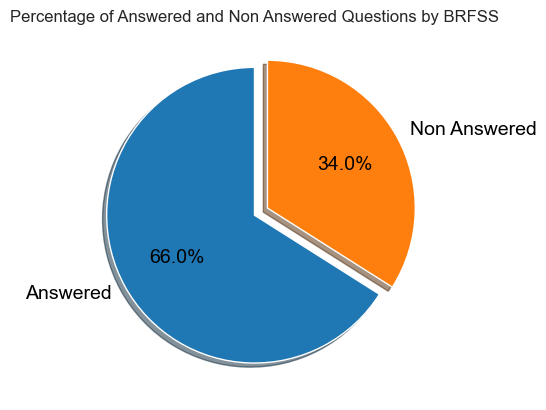

In [291]:
brfss_df = df[df['DataSource'] == 'BRFSS']
brfss_labels = 'Answered', 'Non Answered'
sizes = [brfss_df[brfss_df["DataValue"].notnull()].shape[0], brfss_df[brfss_df["DataValue"].isnull()].shape[0]]

plt.pie(sizes, explode=(0, 0.1) , labels=brfss_labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'color': 'black'})
plt.title("Percentage of Answered and Non Answered Questions by BRFSS")
plt.savefig('Percentage of Answered and Non Answered Questions by BRFSS.png')
plt.show()

#### 16.1# Reasons for non answered questions by BRFSS

In [282]:
df[(df['DataSource'] == 'BRFSS') & (df['DataValue'].isnull())]['DatavalueFootnote'].value_counts()

Sample size of denominator and/or age group for age-standardization is less than 50 or relative standard error is more than 30%                                  176849
No data available                                                                                                                                                 46365
US Median is not available because the number of participating states is <30 (excludes states with sample size below 50 or relative standard error above 30%)       132
Name: DatavalueFootnote, dtype: int64

#### 17# Why the most reason of non answered questions after "lacking data" is "State does not present estimate on specific race" ?

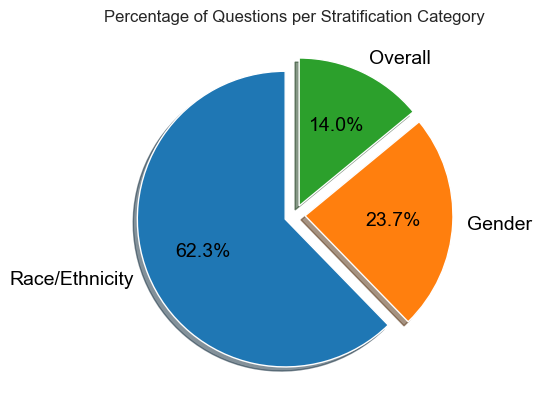

In [293]:
# pie chart of the number of questions per stratification category
labels = 'Race/Ethnicity', 'Gender', 'Overall'
race_df = df[df['StratificationCategory1'] == 'Race/Ethnicity']
gender_df = df[df['StratificationCategory1'] == 'Gender']
overall_df = df[df['StratificationCategory1'] == 'Overall']
sizes = [race_df.shape[0], gender_df.shape[0], overall_df.shape[0]]
explode = (0.07, 0.07 ,0.07)
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90, textprops={'fontsize': 14, 'color': 'black'})
plt.title("Percentage of Questions per Stratification Category")
plt.savefig('Percentage of Questions per Stratification Category.png')
plt.show()

#### 18# Race with the most state-ban specific estimation

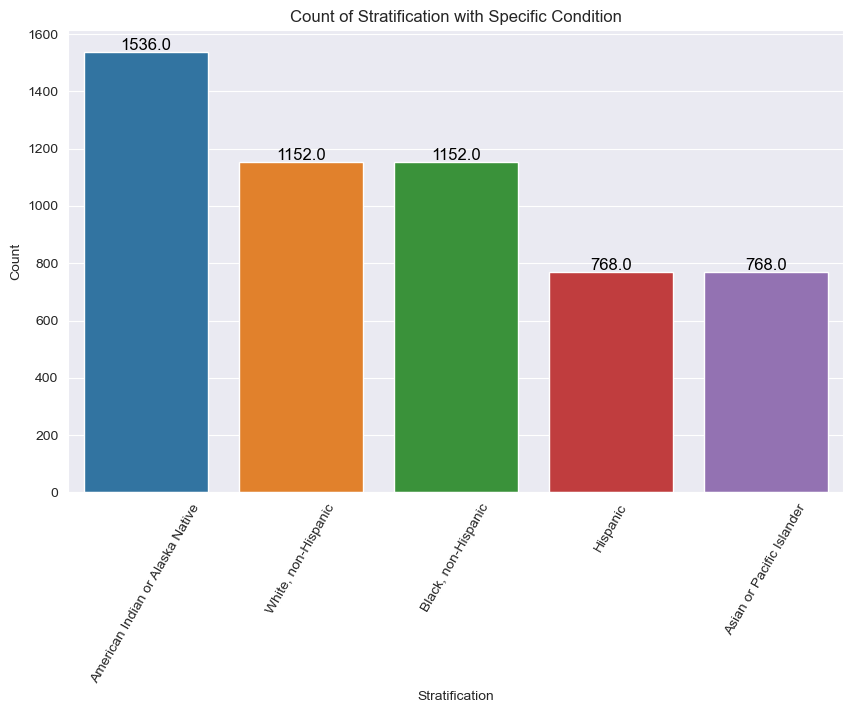

In [284]:
non_ans_race = race_df[race_df['DatavalueFootnote'] == 'The state registry opted not to present state-specific estimates for this race/ethnicity group']
plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Stratification1', data=non_ans_race, order=non_ans_race['Stratification1'].value_counts().index)

# Add annotations above each bar
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Stratification')
plt.ylabel('Count')
plt.title('Count of Stratification with Specific Condition')
plt.xticks(rotation=60)
plt.savefig('Count of Stratification with Specific Condition.png', dpi=400)
# Show the plot
plt.show()

#### 19# States that do not allow specific race estimation

In [285]:
non_ans_race['LocationDesc'].unique()

array(['Illinois', 'New York', 'Massachusetts', 'New Jersey', 'Kansas'],
      dtype=object)

#### 19.2# Are those non answered questions (because of race) depends on race?

In [286]:
non_ans_race['Topic'].unique()

array(['Cancer'], dtype=object)

In [287]:
non_ans_race['Question'].unique()

array(['Invasive cancer of the oral cavity or pharynx, incidence',
       'Invasive cancer of the prostate, incidence',
       'Cancer of the oral cavity and pharynx, mortality',
       'Cancer of the prostate, mortality',
       'Cancer of the colon and rectum (colorectal), incidence',
       'Invasive cancer (all sites combined), incidence',
       'Invasive cancer (all sites combined), mortality',
       'Invasive cancer of the female breast, incidence',
       'Cancer of the female breast, mortality',
       'Cancer of the female cervix, mortality',
       'Invasive cancer of the cervix, incidence',
       'Cancer of the colon and rectum (colorectal), mortality',
       'Cancer of the lung and bronchus, incidence',
       'Cancer of the lung and bronchus, mortality',
       'Invasive melanoma, incidence', 'Melanoma, mortality'],
      dtype=object)

## Focusing on the answered questions
#### 20# Reasons for the huge number of questions by BRFSS
We found out that the data set contains 17 topics and 31 Data Source, so we will check the number of unique topics by every data source

In [288]:
df.nunique()

YearStart                       16
YearEnd                         16
LocationAbbr                    55
LocationDesc                    55
DataSource                      31
Topic                           17
Question                       203
DataValueUnit                   12
DataValueType                   19
DataValue                    41224
DataValueFootnoteSymbol         17
DatavalueFootnote               18
LowConfidenceLimit           22464
HighConfidenceLimit          24000
StratificationCategory1          3
Stratification1                 11
TopicID                         17
QuestionID                     203
DataValueTypeID                 19
StratificationCategoryID1        3
StratificationID1               13
Duration                         4
dtype: int64

#### 20.1# Number of unique topic by every data source

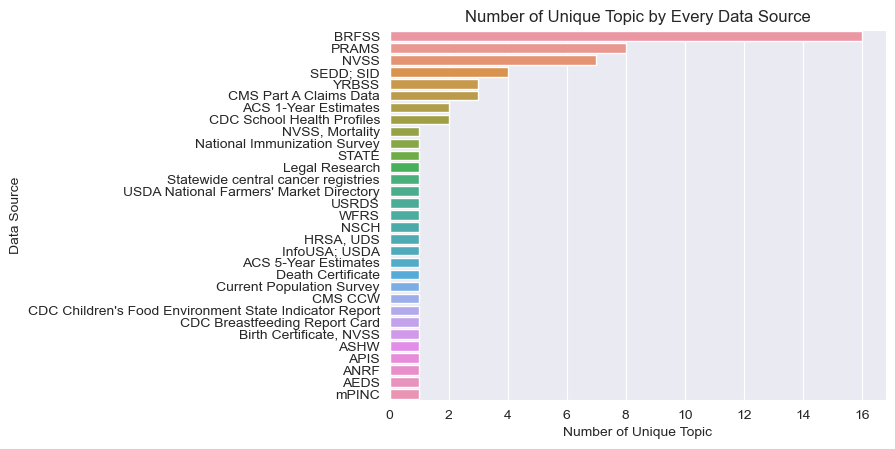

In [289]:
# counting the number of unique topic by every data source
uni_df = df.groupby('DataSource')['Topic'].nunique().sort_values(ascending=False)
uni_df = uni_df.to_frame()
uni_df.reset_index(inplace=True)
# plot the number of unique topic by every data source
sns.barplot(y='DataSource', x='Topic', data=uni_df)
plt.title("Number of Unique Topic by Every Data Source")
plt.ylabel("Data Source")
plt.xlabel("Number of Unique Topic")
plt.figsize=(10, 15)
plt.savefig('Number of Unique Topic by Every Data Source.png', dpi=900)
plt.show()

#### 20.2# Scatter plot with 3 dimensions to understand the reason for the huge number of questions by BRFSS
Number of Questions vs Percentage of Answered Questions vs Number of Unique Topic

C:\Users\Ahmed Khaled\AppData\Local\Temp\ipykernel_24632\3797968485.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sources = df.groupby('DataSource')['Topic','Question'].agg({"Question":"count","Topic":"nunique"})


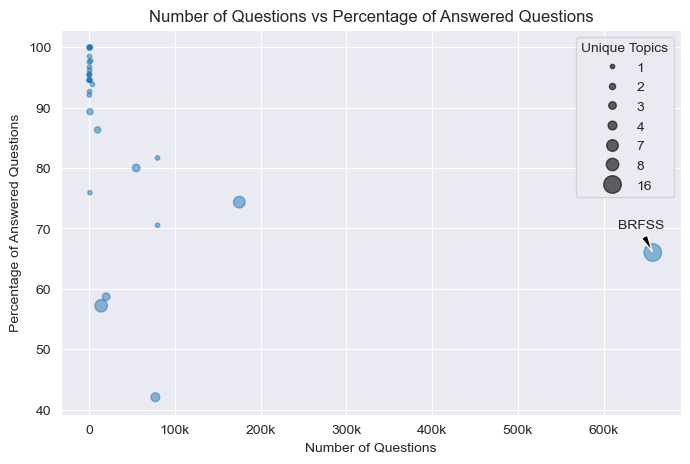

In [290]:

sources = df.groupby('DataSource')['Topic','Question'].agg({"Question":"count","Topic":"nunique"})
sources.rename(columns={'Question' : 'Q_Count'}, inplace=True)

ans = answered_df.groupby('DataSource')['Question'].count().to_frame()
ans.rename(columns={'Question':'Answered_Count'}, inplace=True)

sources = sources.join(ans)
sources['Percentage'] = 100* sources['Answered_Count']/sources['Q_Count']

# Creating Scatter Plot
fig, ax = plt.subplots(figsize=(8, 5))

scatter = ax.scatter(sources['Q_Count'], sources['Percentage'], s=sources['Topic']*10, alpha=0.5 )

unique_sizes = np.unique(sources['Topic'])
labels = [f'{size}' for size in unique_sizes]
handles, _ = scatter.legend_elements(prop="sizes", alpha=0.6)
legend = ax.legend(handles, labels, loc="upper right", title="Unique Topics")

plt.xlabel('Number of Questions')
plt.ylabel('Percentage of Answered Questions')
plt.title('Number of Questions vs Percentage of Answered Questions')
plt.xticks([0, 100000, 200000, 300000, 400000, 500000, 600000], ["0", "100k", "200k", "300k", "400k", "500k", "600k"])

# Annotation for BRFFS
plt.annotate('BRFSS', xy=(sources['Q_Count'].loc['BRFSS'], sources['Percentage'].loc['BRFSS']), xytext=(sources['Q_Count'].loc['BRFSS']-40000, sources['Percentage'].loc['BRFSS'] + 4), arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=5))

plt.savefig('Number of Questions vs Percentage of Answered Questions.png', dpi=900)
plt.show()